## GraphX 

In [ ]:
import matplotlib.pyplot as plt
import random

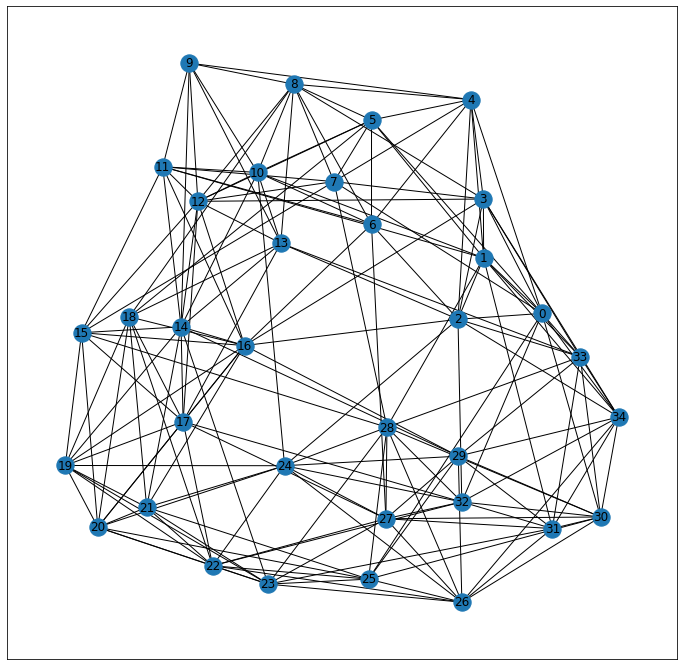

In [ ]:
from graphframes import *

ModuleNotFoundError: ignored

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

22/09/08 23:21:50 WARN Utils: Your hostname, BigData resolves to a loopback address: 127.0.1.1; using 10.3.135.41 instead (on interface ens3)
22/09/08 23:21:50 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/09/08 23:21:51 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [ ]:
!wget https://www.cpe.ku.ac.th/~cnc/downloads/graph0.json

--2022-09-08 23:21:57--  https://www.cpe.ku.ac.th/~cnc/downloads/graph0.json
Resolving www.cpe.ku.ac.th (www.cpe.ku.ac.th)... 158.108.32.150
Connecting to www.cpe.ku.ac.th (www.cpe.ku.ac.th)|158.108.32.150|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4072 (4.0K) [application/json]
Saving to: ‘graph0.json’

graph0.json         100%[===================>]   3.98K  --.-KB/s    in 0s      

2022-09-08 23:21:57 (651 MB/s) - ‘graph0.json’ saved [4072/4072]



In [ ]:
!cat graph0.json

{"nodes": [[0, 0, 29], [1, 1, 43], [34, 34, 54], [2, 2, 36], [33, 33, 25], [3, 3, 54], [32, 32, 37], [4, 4, 49], [5, 5, 39], [30, 30, 51], [7, 7, 36], [25, 25, 38], [31, 31, 49], [28, 28, 35], [11, 11, 25], [10, 10, 46], [6, 6, 46], [13, 13, 48], [24, 24, 26], [16, 16, 34], [8, 8, 29], [12, 12, 36], [9, 9, 52], [18, 18, 53], [27, 27, 49], [15, 15, 33], [14, 14, 40], [17, 17, 50], [19, 19, 43], [21, 21, 43], [23, 23, 49], [29, 29, 33], [20, 20, 30], [22, 22, 53], [26, 26, 34]], "edges": [[0, 1, "friends"], [0, 34, "friends"], [0, 2, "friends"], [0, 33, "follows"], [0, 3, "follows"], [0, 32, "follows"], [0, 4, "friends"], [0, 5, "friends"], [0, 30, "follows"], [0, 7, "follows"], [0, 25, "friends"], [1, 2, "follows"], [1, 3, "friends"], [1, 34, "friends"], [1, 4, "friends"], [1, 33, "follows"], [1, 5, "follows"], [1, 31, "friends"], [1, 28, "friends"], [1, 11, "friends"], [1, 10, "friends"], [34, 2, "follows"], [34, 3, "friends"], [34, 26, "follows"], [34, 29, "follows"], [34, 30, "friend

In [ ]:
!g = graph0.json
!print(g.nodes())

/bin/bash: g: command not found
/bin/bash: -c: line 0: syntax error near unexpected token `g.nodes'
/bin/bash: -c: line 0: `print(g.nodes())'


In [ ]:
#read graph0.json into two arrays
import json

node_list  = [[0, 0, 29], [1, 1, 43], [34, 34, 54], [2, 2, 36], [33, 33, 25], [3, 3, 54], [32, 32, 37], [4, 4, 49], [5, 5, 39], [30, 30, 51], [7, 7, 36], [25, 25, 38], [31, 31, 49], [28, 28, 35], [11, 11, 25], [10, 10, 46], [6, 6, 46], [13, 13, 48], [24, 24, 26], [16, 16, 34], [8, 8, 29], [12, 12, 36], [9, 9, 52], [18, 18, 53], [27, 27, 49], [15, 15, 33], [14, 14, 40], [17, 17, 50], [19, 19, 43], [21, 21, 43], [23, 23, 49], [29, 29, 33], [20, 20, 30], [22, 22, 53], [26, 26, 34]]

edge_list =  [[0, 1, "friends"], [0, 34, "friends"], [0, 2, "friends"], [0, 33, "follows"], [0, 3, "follows"], [0, 32, "follows"], [0, 4, "friends"], [0, 5, "friends"], [0, 30, "follows"], [0, 7, "follows"], [0, 25, "friends"], [1, 2, "follows"], [1, 3, "friends"], [1, 34, "friends"], [1, 4, "friends"], [1, 33, "follows"], [1, 5, "follows"], [1, 31, "friends"], [1, 28, "friends"], [1, 11, "friends"], [1, 10, "friends"], [34, 2, "follows"], [34, 3, "friends"], [34, 26, "follows"], [34, 29, "follows"], [34, 30, "friends"], [34, 31, "friends"], [34, 32, "friends"], [34, 33, "follows"], [2, 3, "friends"], [2, 4, "friends"], [2, 6, "follows"], [2, 33, "friends"], [2, 32, "follows"], [2, 13, "follows"], [2, 24, "follows"], [2, 16, "follows"], [33, 3, "friends"], [33, 13, "follows"], [33, 28, "follows"], [33, 29, "follows"], [33, 30, "follows"], [33, 31, "friends"], [3, 4, "friends"], [3, 7, "friends"], [3, 8, "friends"], [3, 16, "friends"], [3, 12, "follows"], [32, 17, "follows"], [32, 22, "follows"], [32, 24, "follows"], [32, 27, "friends"], [32, 28, "follows"], [32, 30, "friends"], [32, 31, "follows"], [4, 5, "follows"], [4, 6, "friends"], [4, 7, "friends"], [4, 8, "friends"], [4, 9, "follows"], [5, 6, "follows"], [5, 7, "follows"], [5, 8, "follows"], [5, 10, "friends"], [5, 12, "friends"], [5, 18, "follows"], [30, 25, "friends"], [30, 26, "friends"], [30, 27, "friends"], [30, 28, "friends"], [30, 29, "follows"], [30, 31, "friends"], [7, 8, "follows"], [7, 11, "friends"], [7, 12, "follows"], [7, 15, "follows"], [7, 28, "friends"], [25, 20, "follows"], [25, 21, "friends"], [25, 22, "friends"], [25, 23, "friends"], [25, 26, "friends"], [25, 28, "follows"], [25, 29, "follows"], [31, 23, "follows"], [31, 26, "friends"], [31, 27, "friends"], [31, 29, "friends"], [28, 15, "friends"], [28, 23, "follows"], [28, 24, "friends"], [28, 26, "follows"], [28, 27, "friends"], [11, 6, "follows"], [11, 9, "follows"], [11, 10, "follows"], [11, 12, "friends"], [11, 14, "follows"], [11, 15, "follows"], [11, 16, "follows"], [10, 6, "friends"], [10, 8, "follows"], [10, 9, "friends"], [10, 12, "friends"], [10, 13, "follows"], [10, 14, "friends"], [10, 24, "friends"], [6, 8, "friends"], [6, 16, "follows"], [6, 27, "friends"], [13, 8, "friends"], [13, 9, "follows"], [13, 12, "follows"], [13, 14, "friends"], [13, 17, "friends"], [13, 18, "friends"], [24, 19, "follows"], [24, 20, "follows"], [24, 21, "friends"], [24, 22, "follows"], [24, 26, "friends"], [24, 27, "friends"], [24, 29, "follows"], [16, 12, "friends"], [16, 14, "follows"], [16, 15, "friends"], [16, 17, "friends"], [16, 18, "friends"], [16, 19, "follows"], [16, 20, "follows"], [16, 21, "follows"], [16, 29, "friends"], [8, 9, "follows"], [8, 12, "friends"], [8, 18, "follows"], [12, 9, "friends"], [12, 14, "friends"], [12, 15, "friends"], [12, 17, "follows"], [9, 14, "friends"], [18, 17, "friends"], [18, 19, "friends"], [18, 20, "follows"], [18, 21, "follows"], [18, 22, "follows"], [27, 17, "follows"], [27, 22, "friends"], [27, 23, "friends"], [27, 26, "friends"], [27, 29, "follows"], [15, 14, "friends"], [15, 17, "friends"], [15, 19, "friends"], [15, 20, "friends"], [14, 17, "follows"], [14, 19, "friends"], [14, 21, "follows"], [14, 23, "friends"], [14, 29, "follows"], [17, 19, "friends"], [17, 20, "follows"], [17, 22, "friends"], [19, 20, "follows"], [19, 21, "follows"], [19, 22, "friends"], [19, 23, "friends"], [21, 20, "follows"], [21, 23, "friends"], [21, 22, "friends"], [23, 20, "follows"], [23, 22, "follows"], [23, 26, "follows"], [29, 26, "follows"], [20, 22, "friends"], [22, 26, "follows"]]

In [ ]:
node_list

[[0, 0, 29],
 [1, 1, 43],
 [34, 34, 54],
 [2, 2, 36],
 [33, 33, 25],
 [3, 3, 54],
 [32, 32, 37],
 [4, 4, 49],
 [5, 5, 39],
 [30, 30, 51],
 [7, 7, 36],
 [25, 25, 38],
 [31, 31, 49],
 [28, 28, 35],
 [11, 11, 25],
 [10, 10, 46],
 [6, 6, 46],
 [13, 13, 48],
 [24, 24, 26],
 [16, 16, 34],
 [8, 8, 29],
 [12, 12, 36],
 [9, 9, 52],
 [18, 18, 53],
 [27, 27, 49],
 [15, 15, 33],
 [14, 14, 40],
 [17, 17, 50],
 [19, 19, 43],
 [21, 21, 43],
 [23, 23, 49],
 [29, 29, 33],
 [20, 20, 30],
 [22, 22, 53],
 [26, 26, 34]]

In [ ]:
v = spark.createDataFrame(node_list,['id','name','age'])
e = spark.createDataFrame(edge_list,['src','dst','type'])
g = GraphFrame(v, e)

NameError: ignored

In [ ]:
g.inDegrees.show()

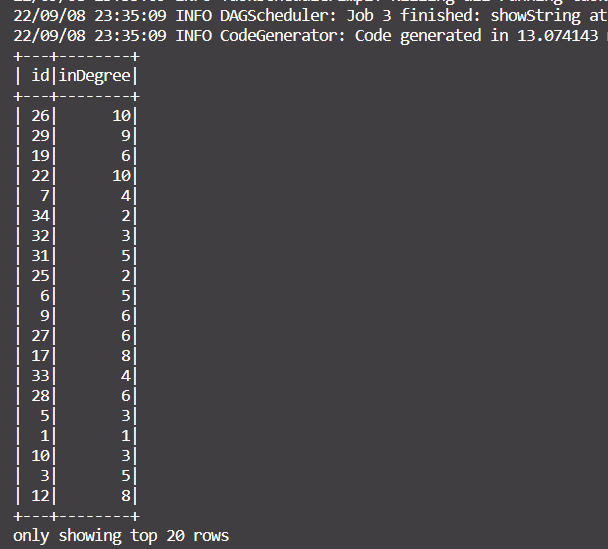

In [ ]:
g.edges.show()

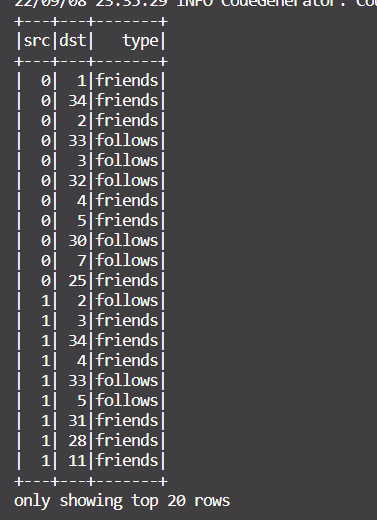

In [ ]:
g.edges.filter("type = 'follows'").count()

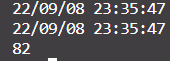

In [ ]:
g.vertices.filter("age > 30").count()

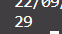

In [ ]:
#to display only edge type friends

g.edges.filter("type = 'friends'").show()

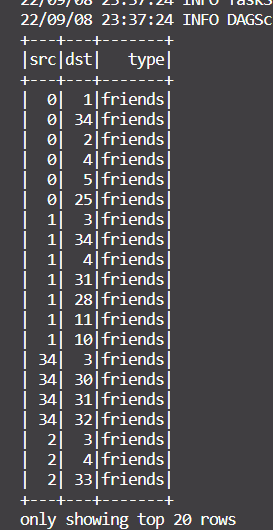

In [ ]:
results = g.pageRank(resetProbability=0.15, maxIter=10, sourceId="1")
results.vertices.select("id", "pagerank").show()

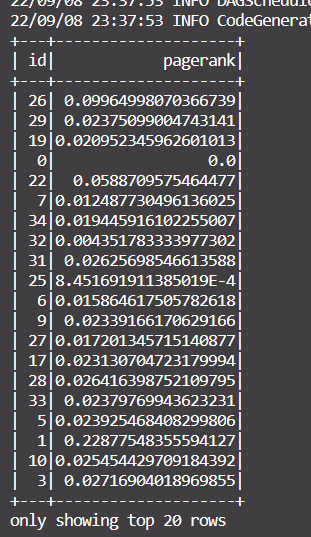

In [ ]:
inDegreeDF=g.inDegrees
outDegreeDF=g.outDegrees
degreeDF=g.degrees

## Spark 

In [ ]:
!wget https://www.cpe.ku.ac.th/~cnc/download/twitter_data.csv.zip

--2022-09-08 23:38:50--  https://www.cpe.ku.ac.th/~cnc/download/twitter_data.csv.zip
Resolving www.cpe.ku.ac.th (www.cpe.ku.ac.th)... 158.108.32.150
Connecting to www.cpe.ku.ac.th (www.cpe.ku.ac.th)|158.108.32.150|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 183520459 (175M) [application/zip]
Saving to: ‘twitter_data.csv.zip’

twitter_data.csv.zi 100%[===================>] 175.02M   101MB/s    in 1.7s    

2022-09-08 23:38:52 (101 MB/s) - ‘twitter_data.csv.zip’ saved [183520459/183520459]



In [ ]:
!unzip twitter_data.csv.zip

Archive:  twitter_data.csv.zip
  inflating: data.csv                


In [ ]:
!mv data.csv twitter_data.csv

In [ ]:

! hdfs dfs -copyFromLocal twitter_data.csv /twitter_data.csv

2022-09-08 23:39:08,059 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
2022-09-08 23:39:09,187 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false
2022-09-08 23:39:09,861 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false
2022-09-08 23:39:10,359 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false
2022-09-08 23:39:10,816 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false


In [ ]:
%%time 
from pyspark.sql import SparkSession

spark = SparkSession.builder \
        .appName("Convert CSV to parquet")      \
        .getOrCreate()


22/09/08 23:39:13 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.
CPU times: user 3.4 ms, sys: 0 ns, total: 3.4 ms
Wall time: 14.1 ms


In [ ]:
from pyspark.sql.types import LongType, StringType, StructField, StructType, BooleanType, ArrayType, IntegerType
 

In [ ]:
twitterSchema = StructType()\
  .add("id", IntegerType(), True)\
  .add("screenName", StringType(), True)\
  .add("tags",  StringType(), True)\
  .add("avatar", StringType(), True)\
  .add("followersCount", IntegerType(), True)\
  .add("friendsCount", IntegerType(), True)\
  .add("lang", StringType(), True)\
  .add("lastSeen",  StringType(), True)\
  .add("tweetId", StringType(), True)\
  .add("friends", StringType(), True)\


df = spark.read.csv("hdfs://localhost:9000/twitter_data.csv",
                    header="true",inferSchema="true", schema=twitterSchema)

In [ ]:
df.head()

Row(id=1969527638, screenName='LlngoMakeEmCum_', tags='[ "#nationaldogday" ]', avatar='http://pbs.twimg.com/profile_images/534286217882652672/FNmiQYVO_normal.jpeg', followersCount=319, friendsCount=112, lang='en', lastSeen='1472271687519', tweetId='769310701580083200', friends='[ "1969574754"')

In [ ]:

!hdfs dfs -rm -r -f /twitter_data.csv.parquet
df.write.parquet("hdfs://localhost:9000/twitter_data.csv.parquet")



2022-09-08 23:39:26,222 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [ ]:
df = spark.read.parquet("hdfs://localhost:9000/twitter_data.csv.parquet")

In [ ]:
df.show()

+----------+---------------+--------------------+--------------------+--------------+------------+----+-------------+------------------+--------------------+
|        id|     screenName|                tags|              avatar|followersCount|friendsCount|lang|     lastSeen|           tweetId|             friends|
+----------+---------------+--------------------+--------------------+--------------+------------+----+-------------+------------------+--------------------+
| 333830570|   AshleyBDixon|[ "#nationaldogda...|http://pbs.twimg....|           783|         518|  en|1472255387025|769296201187336193|       [ "324516328"|
|      null|    godlyaudrey|[ "#nationaldogda...|http://pbs.twimg....|           920|         481|  en|1472257746289|769297799326203905|       [ "797638152"|
| 102503306|    getprettyau|[ "#nationaldogda...|http://pbs.twimg....|           123|         184|  en|1472257746104|769297800102289409|        [ "54669129"|
|1684669032| __toriapnelson|[ "#nationaldogda...|htt

In [ ]:
#what is the average friend counts
df1 = df.filter(df.friendsCount > 0)
df1.agg({'friendsCount': 'avg'}).show()

+-----------------+
|avg(friendsCount)|
+-----------------+
|957.6924713953081|
+-----------------+



In [ ]:
df.take(1)

[Row(id=333830570, screenName='AshleyBDixon', tags='[ "#nationaldogday" ]', avatar='http://pbs.twimg.com/profile_images/616781906089107456/agK83iyz_normal.jpg', followersCount=783, friendsCount=518, lang='en', lastSeen='1472255387025', tweetId='769296201187336193', friends='[ "324516328"')]

In [ ]:
#the screenName in twitter_data.csv who has the maximum followers?
df.agg({'followersCount': 'max'}).show()

+-------------------+
|max(followersCount)|
+-------------------+
|           14765554|
+-------------------+



In [ ]:
df.filter(df.followersCount == 14765554).show()

+--------+------------+--------------------+--------------------+--------------+------------+----+-------------+------------------+--------------+
|      id|  screenName|                tags|              avatar|followersCount|friendsCount|lang|     lastSeen|           tweetId|       friends|
+--------+------------+--------------------+--------------------+--------------+------------+----+-------------+------------------+--------------+
|16190898|RyanSeacrest|[ "#nationaldogda...|http://pbs.twimg....|      14765554|         645|  en|1472256635487|769297030615302146|[ "1951639321"|
+--------+------------+--------------------+--------------------+--------------+------------+----+-------------+------------------+--------------+

